In [1]:
import  tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

In [2]:
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

GPU is NOT AVAILABLE


In [3]:
dataset,info = tfds.load('imdb_reviews',as_supervised=True,with_info=True)

In [4]:
train,test = dataset['train'], dataset['test']
print(len(train))
print(len(test))

25000
25000


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [6]:
train_sentences = []
train_labels = []
for x,y in train:
    x = [word for word in x.numpy().decode('utf8').split(" ") if word.lower() not in stopwords]
    x = " ".join(x)
    train_sentences.append(x)
    train_labels.append(y.numpy())
train_labels = np.asarray(train_labels).astype(np.float32)

In [7]:
test_sentences =[]
test_labels = []
for x,y in test:
    #remove stop words
    x = [word for word in x.numpy().decode('utf8').split(" ") if word.lower() not in stopwords]
    x = " ".join(x)
    test_sentences.append(x)
    test_labels.append(y.numpy())
test_labels = np.asarray(test_labels).astype(np.float32)

In [8]:
#Encode the words, you encode only training data
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
print(len(tokenizer.word_index))

88579


In [9]:
#Convert sent to seq based on above encode
train_seq = tokenizer.texts_to_sequences(train_sentences)
test_seq = tokenizer.texts_to_sequences(test_sentences)

In [10]:
#Pad the train_seq, test_seq to same lenth of 250 word
padded_train_seq = pad_sequences(train_seq, maxlen=250,truncating='post')
padded_test_seq = pad_sequences(test_seq, maxlen=250)

In [11]:
print(padded_train_seq.shape)
print(padded_test_seq.shape)

(25000, 250)
(25000, 250)


In [12]:
#Define and compile the model
vocab_size = len(tokenizer.word_index)+1
embedding_dim = 16
max_length = 250
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 16)           1417280   
_________________________________________________________________
flatten (Flatten)            (None, 4000)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 24006     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 1,441,293
Trainable params: 1,441,293
Non-trainable params: 0
_________________________________________________________________


In [13]:
print(type(padded_train_seq))
print(type(train_labels))
print(type(padded_test_seq))
print(type(test_labels))
print(padded_train_seq.shape)
print(train_labels.shape)
print(padded_test_seq.shape)
print(test_labels.shape)


history = model.fit(padded_train_seq, train_labels, 
                    epochs=10,
                    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)],
                    validation_data=(padded_test_seq,test_labels),
                     verbose=2)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(25000, 250)
(25000,)
(25000, 250)
(25000,)
Epoch 1/10
782/782 - 15s - loss: 0.4034 - accuracy: 0.7989 - val_loss: 0.2922 - val_accuracy: 0.8756
Epoch 2/10
782/782 - 14s - loss: 0.1204 - accuracy: 0.9580 - val_loss: 0.3168 - val_accuracy: 0.8716
Epoch 3/10
782/782 - 14s - loss: 0.0255 - accuracy: 0.9953 - val_loss: 0.3757 - val_accuracy: 0.8684
Epoch 4/10
782/782 - 14s - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.4140 - val_accuracy: 0.8717
Epoch 5/10
782/782 - 14s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4480 - val_accuracy: 0.8714
Epoch 6/10
782/782 - 14s - loss: 5.9291e-04 - accuracy: 1.0000 - val_loss: 0.4770 - val_accuracy: 0.8715
Epoch 7/10
782/782 - 14s - loss: 3.1080e-04 - accuracy: 1.0000 - val_loss: 0.5043 - val_accuracy: 0.8708
Epoch 8/10
782/782 - 14s - loss: 1.7871e-04 - accuracy: 1.0000 - val_loss: 0.5285 - val_accuracy: 0.8710


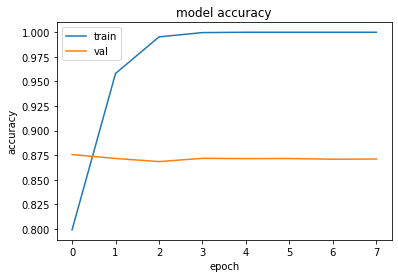

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

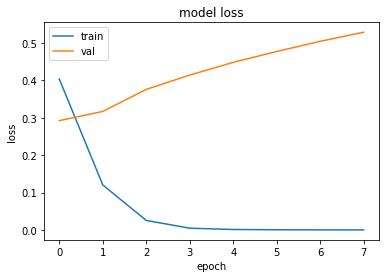

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
score = model.evaluate(padded_test_seq,test_labels)
print("test loss, test acc:", score)


782/782 [==============================] - 1s 1ms/step - loss: 0.5285 - accuracy: 0.8710
test loss, test acc: [0.5284759998321533, 0.8710399866104126]
